# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
age_values = [17,51,27,21,36,48,19,26,54,30]
tar_values = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'age': age_values, 'tardies': tar_values})

Draw a dispersion diagram (scatter plot) for the data.

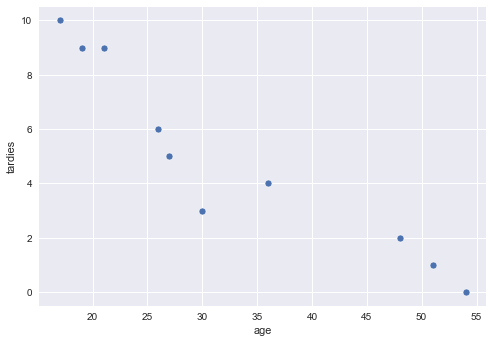

In [3]:
sns.scatterplot(x='age', y='tardies', data=student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

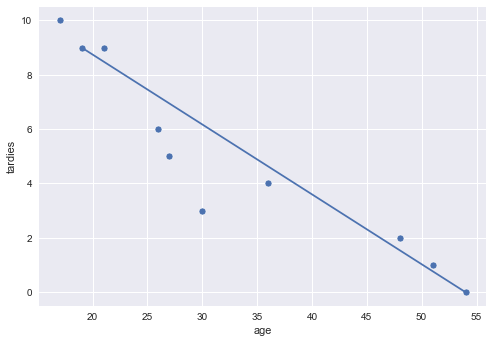

In [4]:
# A first hypothesis could be that the relation, between age and tardies,
# is given by a line formed by (x0,y0) = (19,9) and (x1,y1) = (54,0);
# which means that the older the students are, the less tardies the have
sns.scatterplot(x='age', y='tardies', data=student_data)
sns.lineplot(x=[19,54], y=[9,0]);

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

Basically, the correlation method is normalized while the covariance method is not. what's more, the correlation method is based on the covariance, as is shown below:

- $corr(x,y) = cov(x,y) / (std(x).std(y)$

In [5]:
student_data.cov()

,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


In [6]:
student_data.corr()

,age,tardies
age,1.000000,-0.939163
tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

- Ordinary least squares Linear Regression.

In [7]:
linear = LinearRegression()

In [8]:
# creating a linear model:
linear.fit(student_data.age.to_frame(), student_data.tardies)

LinearRegression()

In [9]:
y_pred = linear.predict(student_data.age.to_frame())

Plot your regression model on your scatter plot.

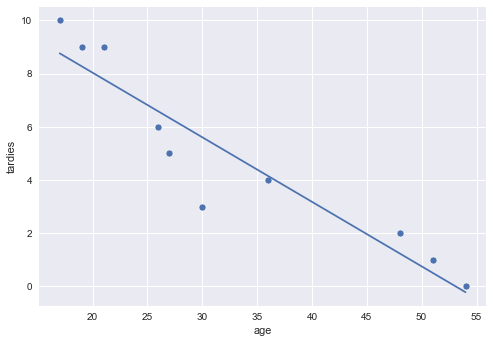

In [10]:
sns.lineplot(x=student_data.age, y=y_pred)
sns.scatterplot(x='age', y='tardies', data=student_data);

Interpret the results of your model. What conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [11]:
# coefficient of determination R^2 of the prediction:
linear.score(student_data.age.to_frame(), student_data.tardies)
# the r^2 coeficient (0.882) tell us that que estimation is pretty good.

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
vehicles = pd.read_csv(
    'vehicles.csv',
    usecols=['Year', 
             'Cylinders', 
             'Fuel Barrels/Year', 
             'Combined MPG', 
             'Fuel Cost/Year',
             'CO2 Emission Grams/Mile'
            ]
)

Let's use the following variables for our analysis: `Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year`. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

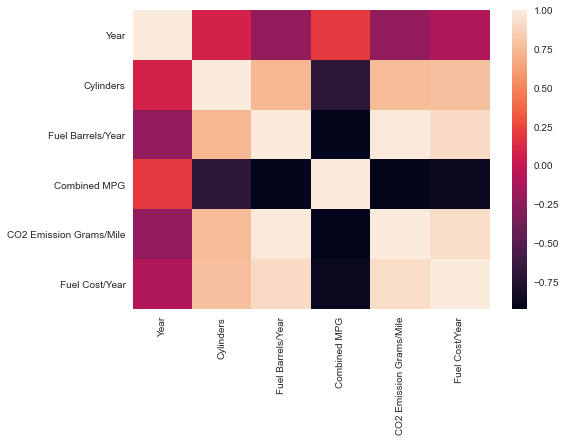

In [13]:
sns.heatmap(vehicles.corr());

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
reg = LinearRegression()

In [15]:
# defining X and y:
X = vehicles[['Year', 
             'Cylinders', 
             'Fuel Barrels/Year', 
             'Combined MPG', 
             'Fuel Cost/Year',]]
y = vehicles['CO2 Emission Grams/Mile']

reg.fit(X,y)

LinearRegression()

In [16]:
y_pred = reg.predict(X)

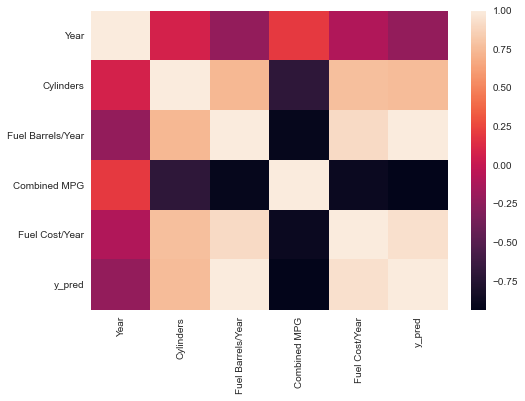

In [17]:
sns.heatmap(pd.concat([X,pd.DataFrame(y_pred, columns=['y_pred'])], axis=1).corr());

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [18]:
# coefficient of determination R^2 of the prediction:
reg.score(X,y)

0.9808734920269122

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [19]:
df = pd.DataFrame(
    {'invited people':[1,3,4,6,8,9,11,14],
     'attended people':[1,2,4,4,5,7,8,13]}
)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

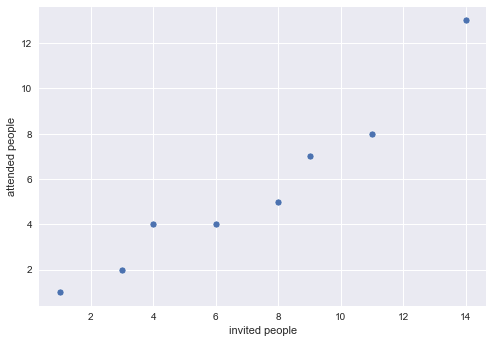

In [20]:
sns.scatterplot(x='invited people',y='attended people',data=df);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [21]:
lr = LinearRegression()
lr.fit(df['invited people'].to_frame(), df['attended people'])
y_pred = lr.predict(df['invited people'].to_frame())

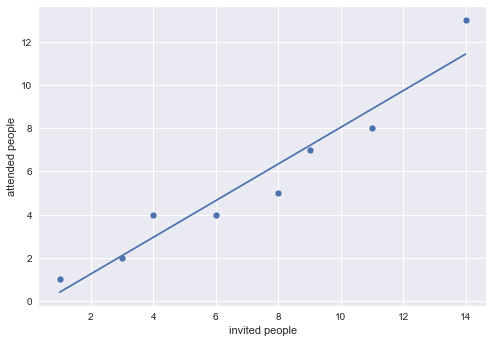

In [22]:
sns.scatterplot(x='invited people',y='attended people',data=df)
sns.lineplot(x=df['invited people'], y=y_pred);

In [26]:
# coefficient of determination R^2 of the prediction:
lr.score(df['invited people'].to_frame(), df['attended people'])

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

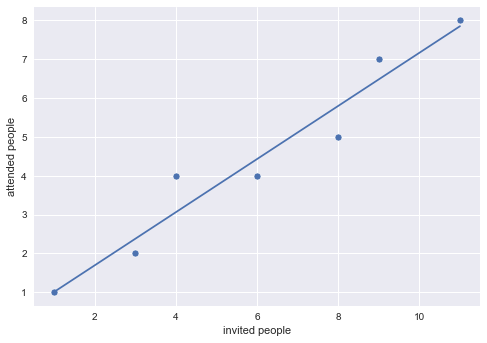

In [29]:
df.drop(7,inplace=True)
lr2 = LinearRegression()
lr2.fit(df['invited people'].to_frame(), df['attended people'])
y_pred2 = lr2.predict(df['invited people'].to_frame())
sns.scatterplot(x='invited people',y='attended people',data=df)
sns.lineplot(x=df['invited people'], y=y_pred2);

In [30]:
lr2.score(df['invited people'].to_frame(), df['attended people'])

0.9433811802232854

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

- The coeficient $R^2$ raised one point, from .93 to .94